In [48]:
# xmlrpc_client.ipynb

import xmlrpc.client as client
import pickle
import pandas as pd

server = client.ServerProxy("http://localhost:8012/RPC2")

"""print('Ping:', server.ping())
print('Server datetime:', server.now())
print('View, type, value:', server.type(2))
print('View, type, value:', server.type(2.))
print( 'View, type, value:', server.type('My string'))
print ('View, type, value:', server.type("My string"))
print ('View, type, value:', server.type([1,2,3]))
print ('View, type, value:', server.type(["one", "two", "three"]))
print ('View, type, value:', server.type((1,2,"3")))
print ('Sum 2 + 3 :', server.sum(2, 3))
print ('Pow 2^3: ', server.pow(2, 3))"""
print(pd.read_json(server.slice_log([], '2023-11-27 21:00:50', '2023-11-28 22:51:50', 1.0, 2.0)))

Empty DataFrame
Columns: []
Index: []


C:\Users\pavel\AppData\Local\Temp\ipykernel_34904\1089447934.py:20: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  print(pd.read_json(server.slice_log([], '2023-11-27 21:00:50', '2023-11-28 22:51:50')))


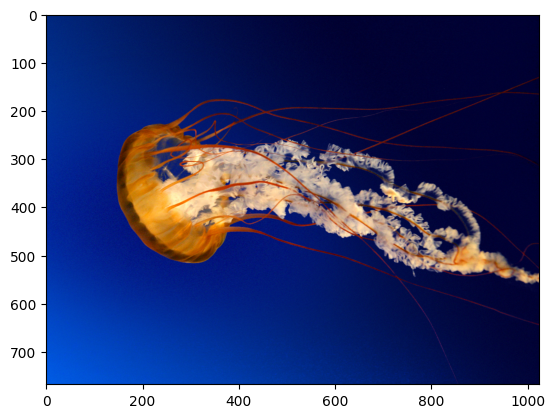

In [3]:
from PIL import Image # Работа с изображением
from pylab import * # Отображение

# Режим отображения внутри ноутбука
%matplotlib inline

img = Image.open('Jellyfish.jpg')
black_img = Image.open('11.bmp')

img_arr = array(img)
black_arr = array(black_img)

# Исходное изображение
imshow(img_arr)

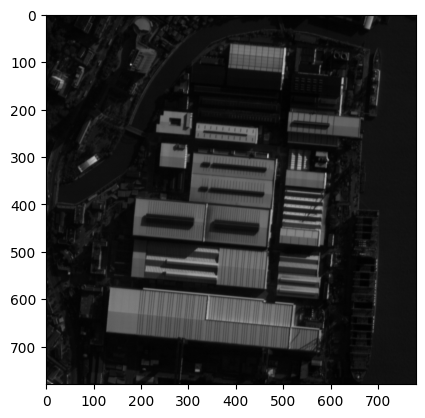

In [4]:
imshow(black_img, cmap='gray')

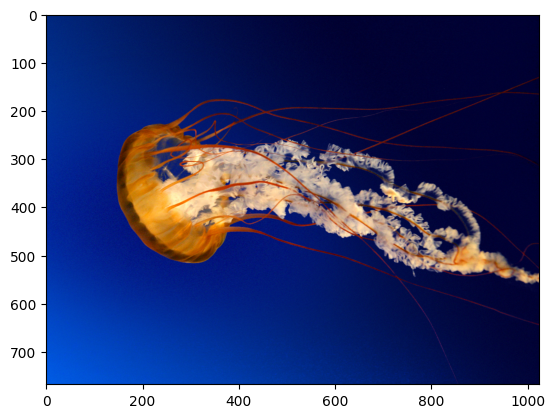

In [5]:
from xmlrpc.client import *
# Тест бинарной передачи данных
#pimg = img_arr.dumps()
pimg = pickle.dumps(img_arr) # универсально

img_bin = Binary(pimg)

img_bin2 = server.send_back_binary(img_bin)

#img_arr2 = np.loads(img_bin2.data)
img_arr2 = pickle.loads(img_bin2.data) # универсально

# Изображение после возрата с сервера
imshow(img_arr2)

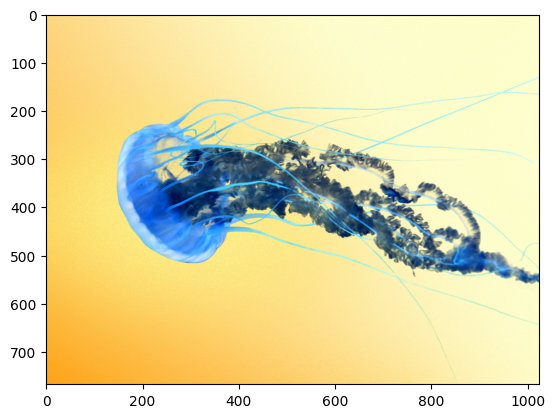

In [6]:

# Инверсия цвета изображения через сервер
def inv_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = Binary(pimg)
    
    img_bin2 = server.color_inversion(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_inv = inv_color(img_arr)
black_img_inv = inv_color(black_arr)

# Изображение с инверсией цвета
imshow(img_arr_inv)


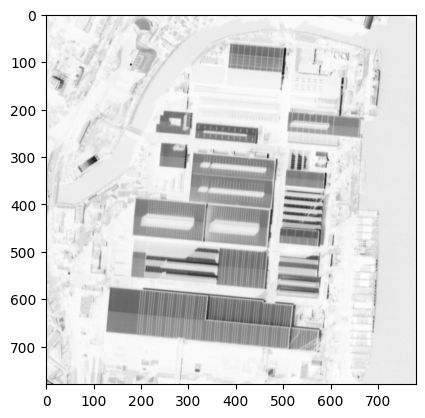

In [7]:
imshow(black_img_inv, cmap='gray')

In [8]:
print (server.black_list_check(u'Петров'))
print (server.black_list_check(u'Примеров'))


Петров: bad_boy
Примеров: good_boy


In [9]:
print(server.black_list_check_with_date_and_fullname('Петров', 'Петр', 'Петрович', '07.08.1985'))

ПетровПетрПетрович with birthday: 07.08.1985 : bad_boy


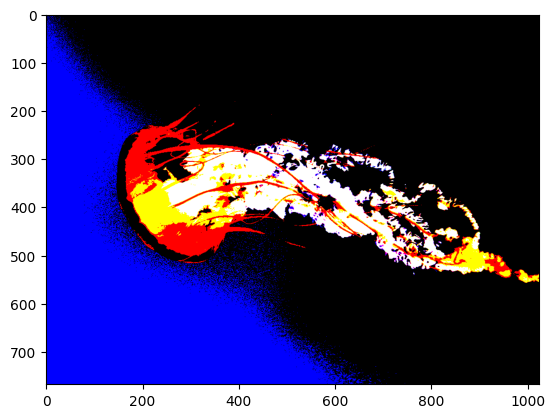

In [10]:
# Бинаризация цвета изображения через сервер
def bin_color(img_arr_in, border):
    pimg = pickle.dumps(img_arr_in)
    img_bin = Binary(pimg)
    
    img_bin2 = server.binary_img(img_bin, border)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

binary_rgb = bin_color(img_arr, 128)
binary_black = bin_color(black_arr, 128)

imshow(binary_rgb)

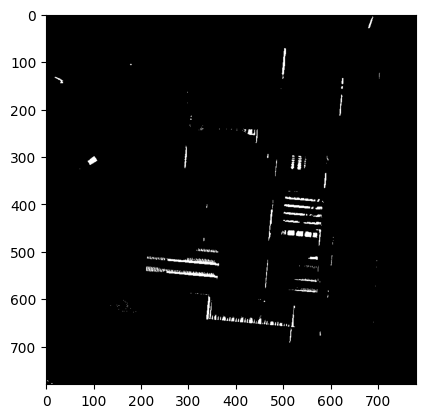

In [11]:
imshow(binary_black, cmap='gray')

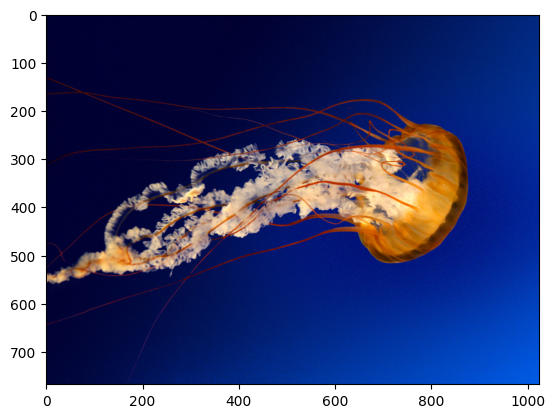

In [12]:

def rev_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = Binary(pimg)
    
    img_bin2 = server.reverse(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

rev_rgb = rev_color(img_arr)
rev_black = rev_color(black_arr)

imshow(rev_rgb)

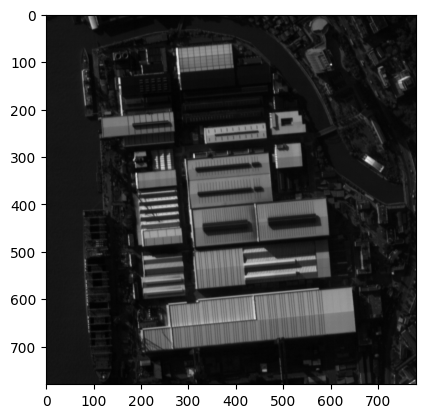

In [13]:
imshow(rev_black, cmap='gray')